In class programming:
1. Follow the instruction below and then report how the performance changed.(apply all at once)
• Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
• Dropout layer at 20%.
• Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
• Max Pool layer with size 2×2.
• Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
• Dropout layer at 20%.
• Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
• Max Pool layer with size 2×2.
• Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function.
• Dropout layer at 20%.
• Convolutional layer,128 feature maps with a size of 3×3 and a rectifier activation function.
• Max Pool layer with size 2×2.
• Flatten layer.
• Dropout layer at 20%.
• Fully connected layer with 1024 units and a rectifier activation function.
• Dropout layer at 20%.
• Fully connected layer with 512 units and a rectifier activation function.
• Dropout layer at 20%.
• Fully connected output layer with 10 units and a Softmax activation function
Did the performance change?
2. Predict the first 4 images of the test data using the above model. Then, compare with the actual label for those 4
images to check whether or not the model has predicted correctly.
3. Visualize Loss and Accuracy using the history object

In [12]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD  # Corrected optimizer import


# Fix random seed for reproducibility
np.random.seed(7)

# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
epochs = 5
learning_rate = 0.01
decay_rate = learning_rate / epochs
sgd = SGD(learning_rate=learning_rate, momentum=0.9, decay=decay_rate, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 67s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,915,114 (11.12 MB)

 Trainable params: 2,915,114 (11.12 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 447s 284ms/step - accuracy: 0.2359 - loss: 2.0520 - val_accuracy: 0.4585 - val_loss: 1.4770
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 444s 284ms/step - accuracy: 0.4645 - loss: 1.4735 - val_accuracy: 0.5452 - val_loss: 1.2423
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 500s 282ms/step - accuracy: 0.5495 - loss: 1.2517 - val_accuracy: 0.5989 - val_loss: 1.1160
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 442s 283ms/step - accuracy: 0.6147 - loss: 1.0791 - val_accuracy: 0.6665 - val_loss: 0.9766
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 501s 282ms/step - accuracy: 0.6588 - loss: 0.9587 - val_accuracy: 0.6901 - val_loss: 0.8821
Accuracy: 69.01%


In [13]:
# Predict the first 4 images of the test data
predictions = model.predict(X_test[:4])

# Convert the predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Convert the actual labels to class labels
actual_labels = np.argmax(y_test[:4], axis=1)

# Print the predicted and actual labels for the  first 4 images
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
Predicted labels: [3 8 8 0]
Actual labels: [3 8 8 0]


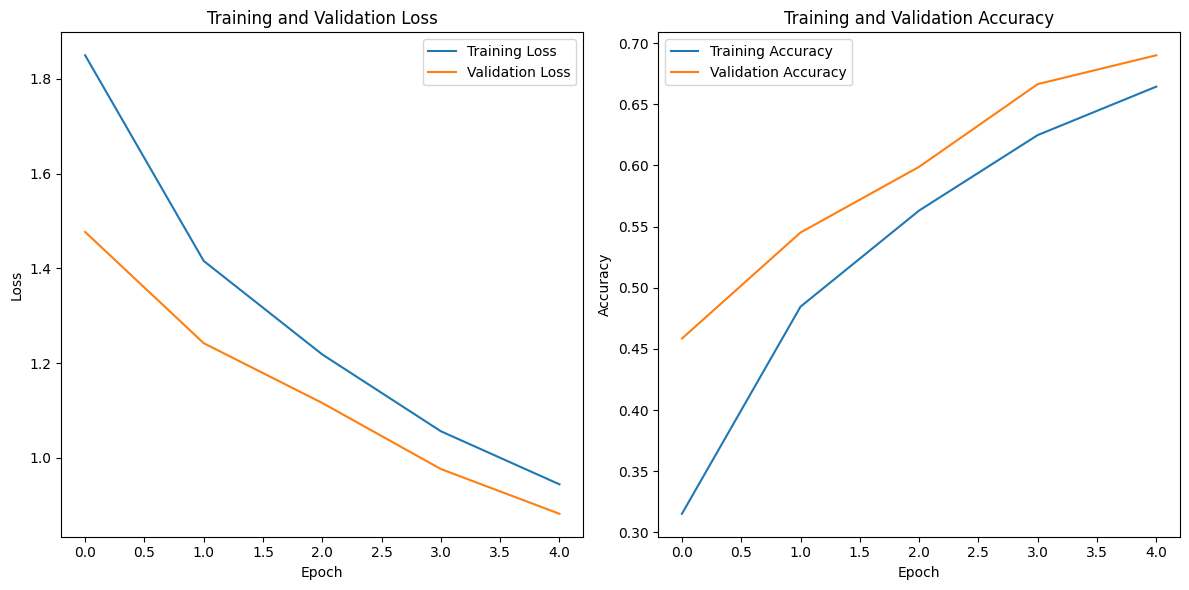

In [14]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()